In [1]:
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('punkt', download_dir='/usr/share/nltk_data')
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

**Question 1b(i)**

In [2]:
import pandas as pd
import torch
from torch.nn.functional import softmax
from transformers import AutoModelForSequenceClassification, AutoTokenizer
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Load the dataset
file_path = 'Magazine_Subscriptions_5.csv'
df_magazine = pd.read_csv(file_path)

# Define the BERT model and tokenizer
BERT_model = "nlptown/bert-base-multilingual-uncased-sentiment"
tokenizer = AutoTokenizer.from_pretrained(BERT_model)
model = AutoModelForSequenceClassification.from_pretrained(BERT_model)

# # Function to clean text
# def clean_text(text):
#     # Convert text to lowercase
#     text = text.lower()
#     # Remove punctuation
#     text = re.sub(f'[{string.punctuation}]', '', text)
#     # Tokenize text
#     tokens = word_tokenize(text)
#     # Remove stopwords
#     stop_words = set(stopwords.words('english'))
#     tokens = [word for word in tokens if word not in stop_words]
#     # Join tokens back into cleaned text
#     cleaned_text = ' '.join(tokens)
#     return cleaned_text


def clean_text(text):
    # Check if the value is a string
    if isinstance(text, str):
        # Convert text to lowercase
        text = text.lower()
        # Remove punctuation
        text = re.sub(f'[{string.punctuation}]', '', text)
        return text
    else:
        # If not a string, return an empty string or handle it as per your requirement
        return ''

# Function to predict sentiment using BERT model
def predict_sentiment(text):
    # Tokenize the text
    encoded_input = tokenizer(text, padding=True, truncation=True, return_tensors='pt')
    # Model prediction
    with torch.no_grad():
        outputs = model(**encoded_input)
    # Extract logits and apply softmax
    probabilities = softmax(outputs.logits, dim=1)
    predictions = torch.argmax(probabilities, dim=1).tolist()
    # Convert numerical predictions to labels
    id_to_label = {0: 'negative', 1: 'negative', 2: 'neutral', 3: 'positive', 4: 'positive'}
    predicted_labels = [id_to_label[pred] for pred in predictions]
    return predicted_labels

# Apply text cleaning and sentiment analysis to 'reviewText' column
df_magazine['cleaned_reviewText'] = df_magazine['reviewText'].apply(clean_text)
df_magazine['sentiment'] = df_magazine['cleaned_reviewText'].apply(predict_sentiment)

# Display the DataFrame with cleaned text and sentiment predictions
print(df_magazine[['reviewText', 'cleaned_reviewText', 'sentiment']])


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/669M [00:00<?, ?B/s]

                                             reviewText  \
0     I'm old, and so is my computer.  Any advice th...   
1     There's nothing to say, but if you want a REAL...   
2     If you're the kind of man who looks at himself...   
3     Nothing to it.  Just an advertisement.  Little...   
4     When PC Magazine ceased publication of their p...   
...                                                 ...   
2370  Not what I expected. Found it boring and lacki...   
2371  I have been a Family Circle readers for years ...   
2372  Even though I have only received 3 issues, I r...   
2373    Great magazine at a great price through Amazon!   
2374  Nice pictures and some good recipes.  Might co...   

                                     cleaned_reviewText   sentiment  
0     im old and so is my computer  any advice that ...  [positive]  
1     theres nothing to say but if you want a real m...  [positive]  
2     if youre the kind of man who looks at himself ...  [positive]  
3     nothi

In [3]:
df_magazine.shape


(2375, 15)

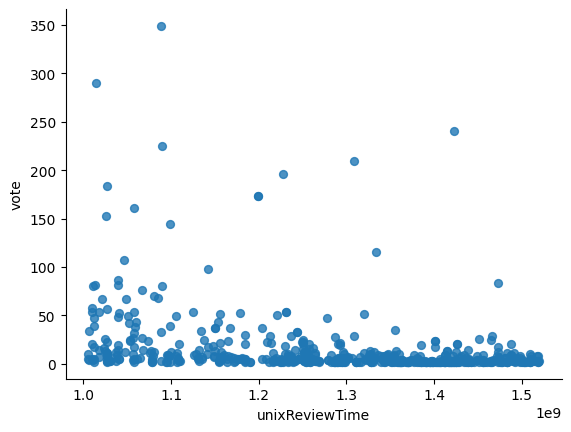

In [4]:


from matplotlib import pyplot as plt
df_magazine.plot(kind='scatter', x='unixReviewTime', y='vote', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

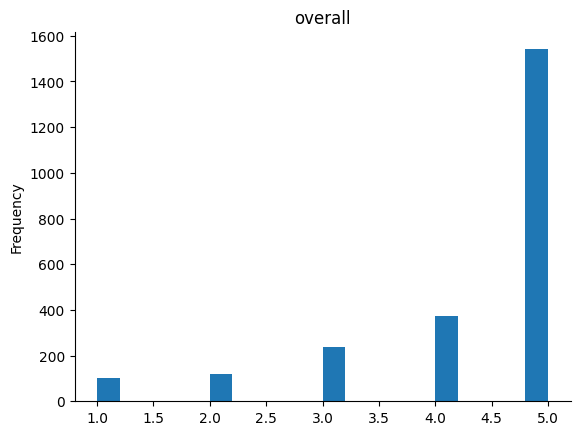

In [5]:

from matplotlib import pyplot as plt
df_magazine['overall'].plot(kind='hist', bins=20, title='overall')
plt.gca().spines[['top', 'right',]].set_visible(False)

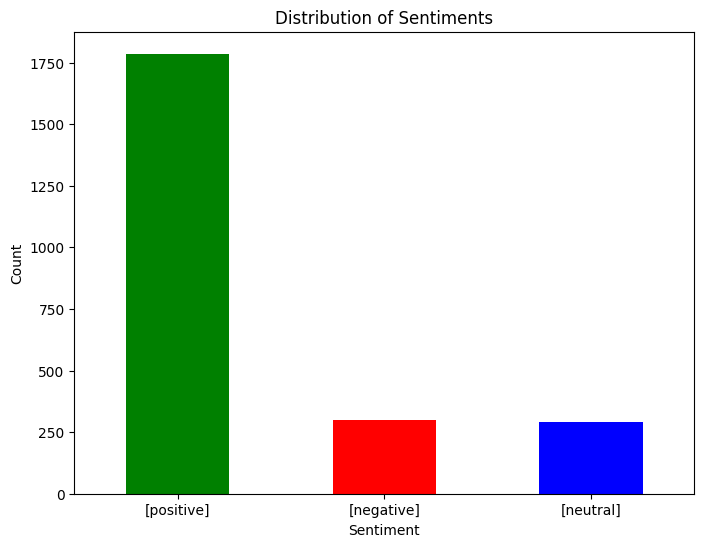

In [6]:
import matplotlib.pyplot as plt

# Count the occurrences of each sentiment
sentiment_counts = df_magazine['sentiment'].value_counts()

# Plot the distribution of sentiments
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


**Question 1b(ii)**

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


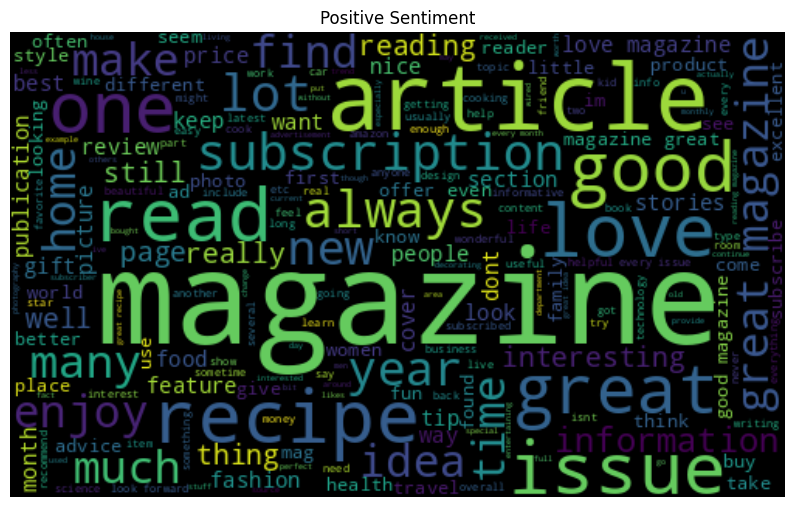

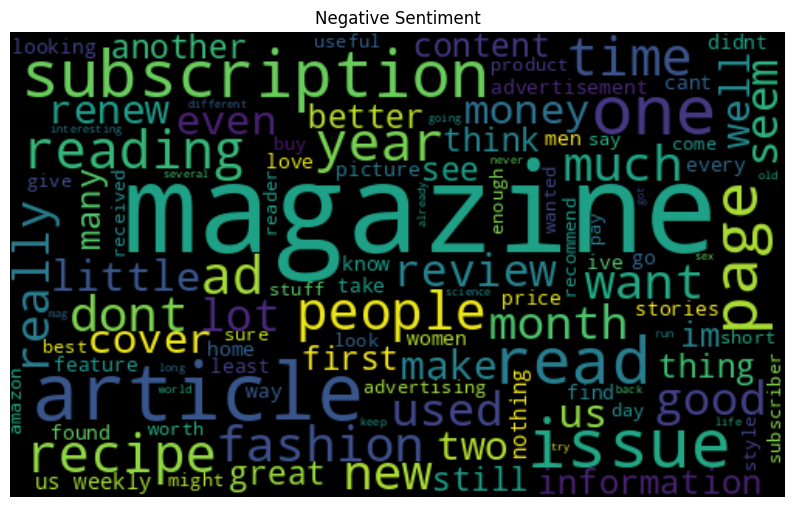

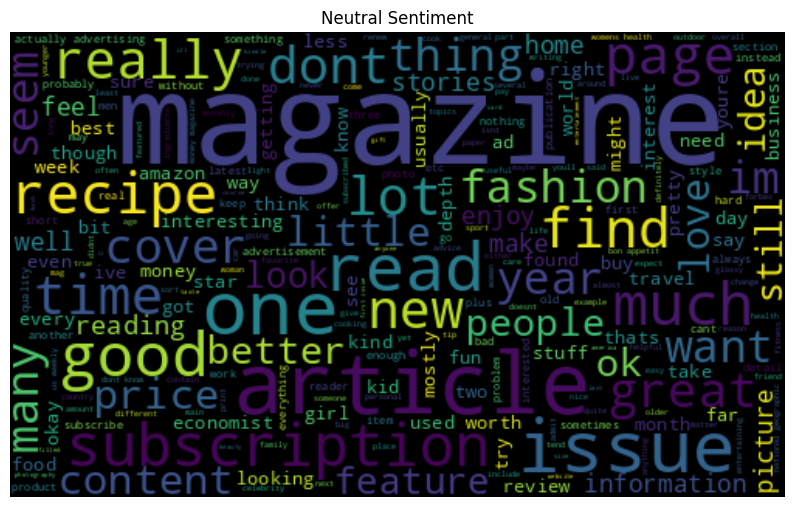

In [7]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import string

# Download stopwords from NLTK
nltk.download('stopwords')

# Function to remove stopwords
def remove_stopwords(text):
    stop = set(stopwords.words('english'))
    punctuation = set(string.punctuation)
    stop.update(punctuation)
    final_text = []
    for word in text.split():
        if word.strip().lower() not in stop:
            final_text.append(word.strip())
    return " ".join(final_text)

# Apply stopwords removal to 'cleaned_reviewText' column
df_magazine['cleaned_reviewText'] = df_magazine['cleaned_reviewText'].apply(remove_stopwords)
df_magazine['sentiment'] = df_magazine['sentiment'].astype(str)
# Separate DataFrame into positive, negative, and neutral sentiments
df_pos = df_magazine[df_magazine['sentiment'] == "['positive']"]
df_neg = df_magazine[df_magazine['sentiment'] == "['negative']"]
df_neu = df_magazine[df_magazine['sentiment'] == "['neutral']"]

# Plotting Positive sentiment word cloud
plt.figure(figsize=(10, 12))
wc_pos = WordCloud(max_words=500, width=500, height=300).generate(" ".join(df_pos['cleaned_reviewText']))
plt.imshow(wc_pos, interpolation='bilinear')
plt.title('Positive Sentiment')
plt.axis('off')

# Plotting Negative sentiment word cloud
plt.figure(figsize=(10, 12))
wc_neg = WordCloud(max_words=500, width=500, height=300).generate(" ".join(df_neg['cleaned_reviewText']))
plt.imshow(wc_neg, interpolation='bilinear')
plt.title('Negative Sentiment')
plt.axis('off')

# Plotting Neutral sentiment word cloud
plt.figure(figsize=(10, 12))
wc_neu = WordCloud(max_words=500, width=500, height=300).generate(" ".join(df_neu['cleaned_reviewText']))
plt.imshow(wc_neu, interpolation='bilinear')
plt.title('Neutral Sentiment')
plt.axis('off')

plt.show()


**Question 1b(iii)**

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Prepare the data
X = df_magazine['cleaned_reviewText']  # Features
y = df_magazine['sentiment']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize the SVM model
svm_model = SVC(kernel='linear', random_state=42)

# Train the SVM model
svm_model.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = svm_model.predict(X_test_tfidf)

# Evaluate the model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

['negative']       0.74      0.38      0.51        65
 ['neutral']       0.82      0.30      0.44        60
['positive']       0.82      0.98      0.89       350

    accuracy                           0.81       475
   macro avg       0.79      0.55      0.61       475
weighted avg       0.81      0.81      0.78       475



In [9]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Confusion Matrix:
[[ 25   3  37]
 [  3  18  39]
 [  6   1 343]]
Accuracy: 0.8126315789473684


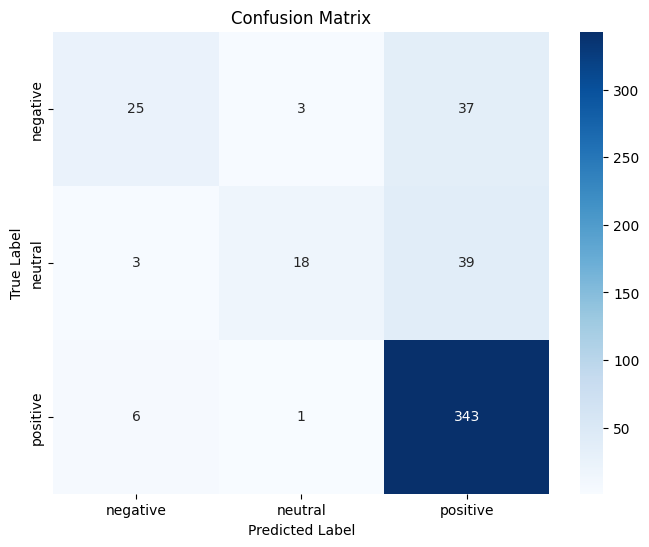

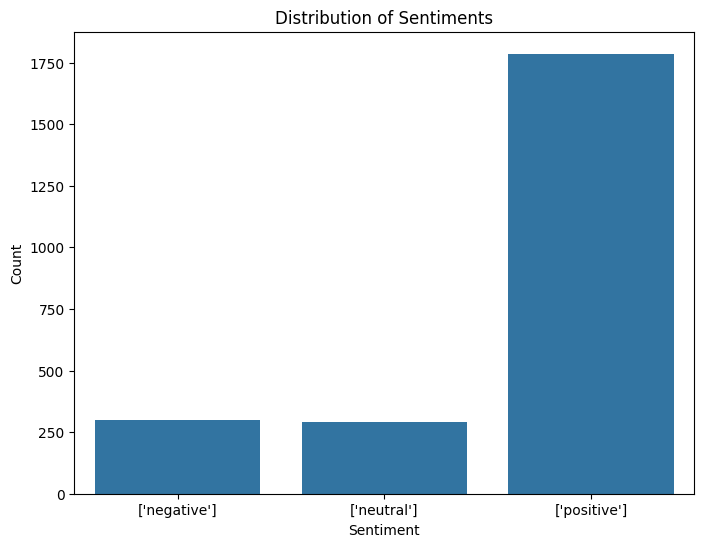

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['negative', 'neutral', 'positive'], yticklabels=['negative', 'neutral', 'positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Plot distribution of sentiments
plt.figure(figsize=(8, 6))
sns.countplot(data=df_magazine, x='sentiment', order=["['negative']", "['neutral']", "['positive']"])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiments')
plt.show()


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Split the data into training and testing sets
X = df_magazine['cleaned_reviewText']
y = df_magazine['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest model
rf_model.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = rf_model.predict(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.8147368421052632
Confusion Matrix:
[[ 16   1  48]
 [  0  21  39]
 [  0   0 350]]


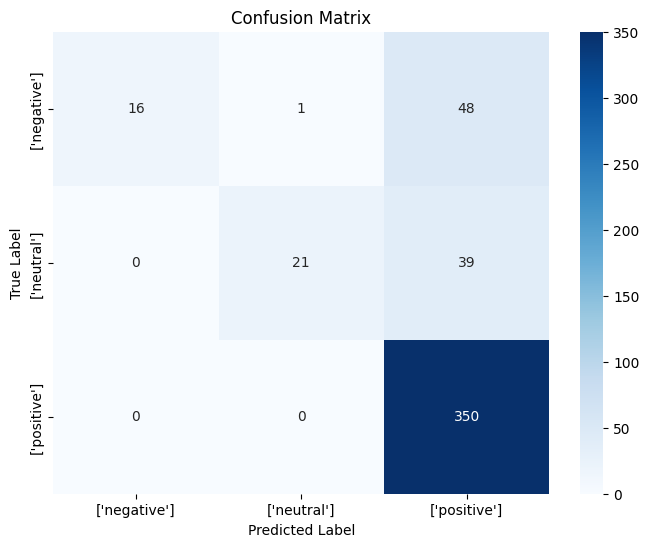

<ipython-input-12-fd36de062a5d>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_test, palette='viridis')


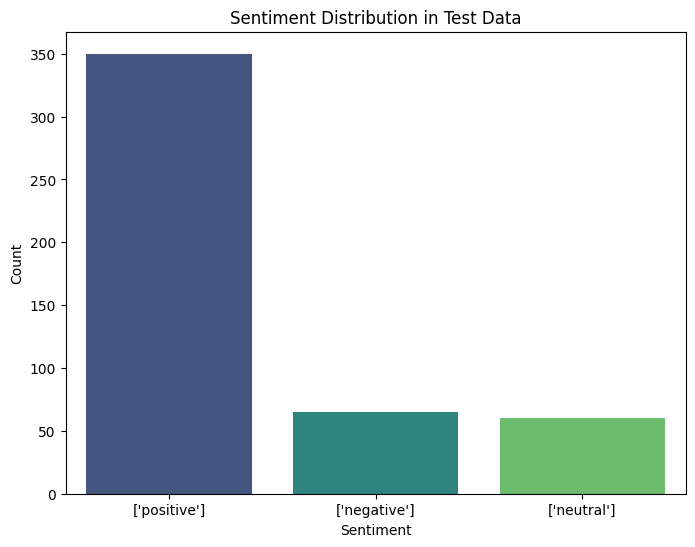

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot bar chart for sentiment distribution in test data
plt.figure(figsize=(8, 6))
sns.countplot(x=y_test, palette='viridis')
plt.title('Sentiment Distribution in Test Data')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


In [13]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_magazine['cleaned_reviewText'])
X = tokenizer.texts_to_sequences(df_magazine['cleaned_reviewText'])
X = pad_sequences(X, maxlen=100)  # Pad sequences to ensure uniform length

# Convert sentiment labels to categorical
y = pd.get_dummies(df_magazine['sentiment']).values

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the deep learning model
model = Sequential([
    Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=100),
    LSTM(128),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")


Epoch 1/10
54/54 [==============================] - 13s 178ms/step - loss: 0.7477 - accuracy: 0.7491 - val_loss: 0.7181 - val_accuracy: 0.7211
Epoch 2/10
54/54 [==============================] - 9s 167ms/step - loss: 0.5474 - accuracy: 0.7889 - val_loss: 0.5204 - val_accuracy: 0.7842
Epoch 3/10
54/54 [==============================] - 10s 181ms/step - loss: 0.3423 - accuracy: 0.8556 - val_loss: 0.5066 - val_accuracy: 0.8105
Epoch 4/10
54/54 [==============================] - 10s 180ms/step - loss: 0.2438 - accuracy: 0.8883 - val_loss: 0.5600 - val_accuracy: 0.7895
Epoch 5/10
54/54 [==============================] - 9s 164ms/step - loss: 0.1901 - accuracy: 0.9211 - val_loss: 0.5684 - val_accuracy: 0.8211
Epoch 6/10
54/54 [==============================] - 9s 172ms/step - loss: 0.1302 - accuracy: 0.9649 - val_loss: 0.7602 - val_accuracy: 0.8211
Epoch 7/10
54/54 [==============================] - 10s 181ms/step - loss: 0.0528 - accuracy: 0.9883 - val_loss: 0.8543 - val_accuracy: 0.8211
Ep

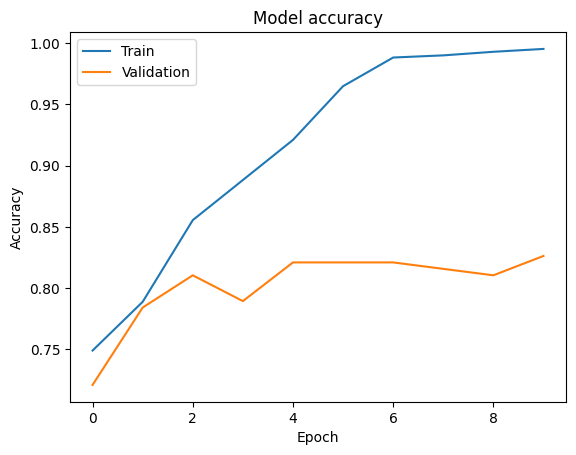

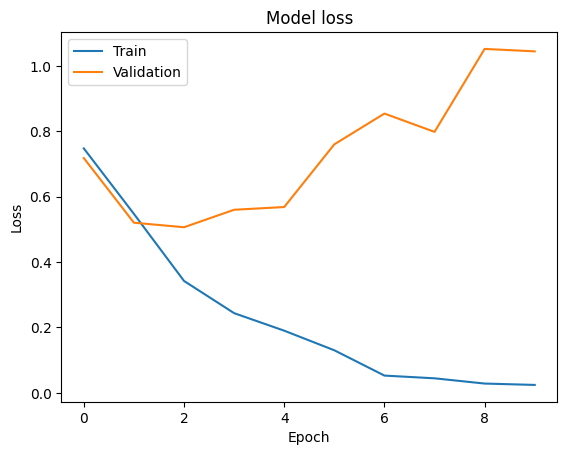

In [14]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


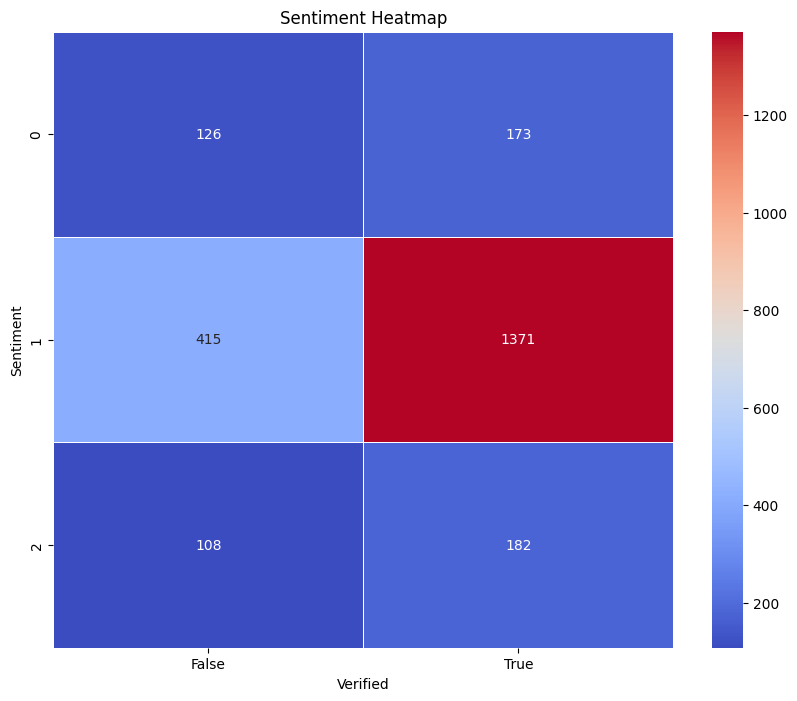

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Encode sentiment classes into numerical values
sentiment_mapping = {"['negative']": 0, "['positive']": 1, "['neutral']": 2}
df_magazine['sentiment_encoded'] = df_magazine['sentiment'].map(sentiment_mapping)

# Create a pivot table with counts of sentiment combinations
heatmap_data = df_magazine.pivot_table(index='sentiment_encoded', columns='verified', aggfunc='size', fill_value=0)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='coolwarm', cbar=True, linewidths=0.5)
plt.title('Sentiment Heatmap')
plt.xlabel('Verified')
plt.ylabel('Sentiment')
plt.show()


**Question 1b(iv)**

In [16]:
import spacy
import pandas as pd

# Load the spaCy English model
nlp = spacy.load("en_core_web_sm")

# Function to perform Named Entity Recognition (NER) on text data
def apply_ner(text):
    if isinstance(text, str):  # Check if text is a string
        # Process the text with spaCy NER
        doc = nlp(text)
        # Extract named entities and their labels
        entities = [(ent.text, ent.label_) for ent in doc.ents]
        return entities
    else:
        return []  # Return empty list for NaNs

# Example usage
# Assuming df_magazine is the DataFrame containing magazine subscription reviews
# and 'reviewText' is the column containing the review text

# Apply NER to review text in the DataFrame
df_magazine['ner_entities'] = df_magazine['reviewText'].apply(apply_ner)

# Display the DataFrame with NER entities
print(df_magazine[['reviewText', 'ner_entities']])


                                             reviewText  \
0     I'm old, and so is my computer.  Any advice th...   
1     There's nothing to say, but if you want a REAL...   
2     If you're the kind of man who looks at himself...   
3     Nothing to it.  Just an advertisement.  Little...   
4     When PC Magazine ceased publication of their p...   
...                                                 ...   
2370  Not what I expected. Found it boring and lacki...   
2371  I have been a Family Circle readers for years ...   
2372  Even though I have only received 3 issues, I r...   
2373    Great magazine at a great price through Amazon!   
2374  Nice pictures and some good recipes.  Might co...   

                                           ner_entities  
0                                                    []  
1                              [(the Know & Tell, ORG)]  
2                               [(every morning, TIME)]  
3                                                    []  
4

**Question 1b(v)**

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pandas as pd

# Assuming df_magazine is the DataFrame containing magazine subscription reviews
# and 'cleaned_reviewText' is the column containing preprocessed review text

# Prepare the document-term matrix using CountVectorizer
vectorizer = CountVectorizer(max_features=1000, lowercase=True, stop_words='english')
X = vectorizer.fit_transform(df_magazine['cleaned_reviewText'])

# Get feature names (words) from the CountVectorizer
feature_names = vectorizer.get_feature_names_out()

# Apply Latent Dirichlet Allocation (LDA) for topic modeling
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

# Function to display top words for each topic
def display_topics(model, feature_names, n_top_words):
    for idx, topic in enumerate(model.components_):
        print(f"Topic {idx+1}:")
        print(", ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
        print()

# Display the top words for each topic
print("Top words for each topic:")
display_topics(lda, feature_names, 10)

# Extract topic distributions for each document
topic_distributions = lda.transform(X)

# Add topic distributions to the DataFrame
for i in range(topic_distributions.shape[1]):
    df_magazine[f"Topic_{i+1}_Distribution"] = topic_distributions[:, i]

# Display the DataFrame with topic distributions
print(df_magazine[['cleaned_reviewText', 'Topic_1_Distribution', 'Topic_2_Distribution', 'Topic_3_Distribution', 'Topic_4_Distribution', 'Topic_5_Distribution']])


Top words for each topic:
Topic 1:
magazine, articles, issue, like, magazines, read, good, article, new, pages

Topic 2:
magazine, love, recipes, great, like, ideas, food, articles, home, good

Topic 3:
fashion, mag, magazine, articles, want, weekly, ok, love, ads, people

Topic 4:
magazine, good, subscription, magazines, like, great, articles, issue, health, recipes

Topic 5:
magazine, great, read, like, really, good, reading, articles, reviews, love

                                     cleaned_reviewText  Topic_1_Distribution  \
0     im old computer advice help maximize computer ...              0.018603   
1     theres nothing say want real mens magazine gre...              0.612151   
2     youre kind man looks full length mirrror every...              0.365536   
3          nothing advertisement little article content              0.838114   
4     pc magazine ceased publication paper magazine ...              0.734437   
...                                                 ...  

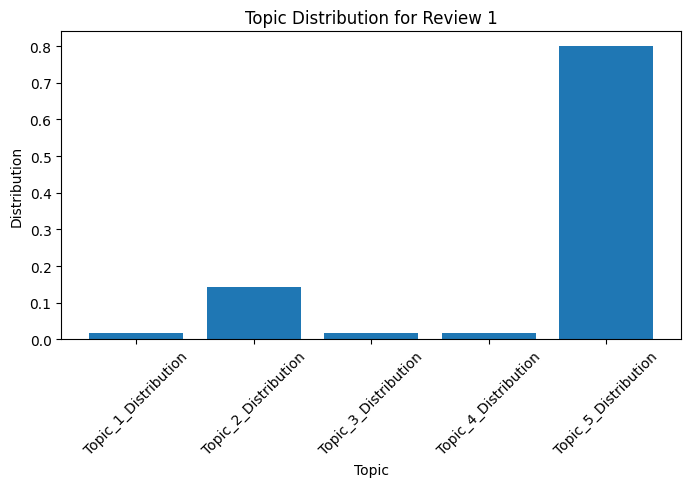

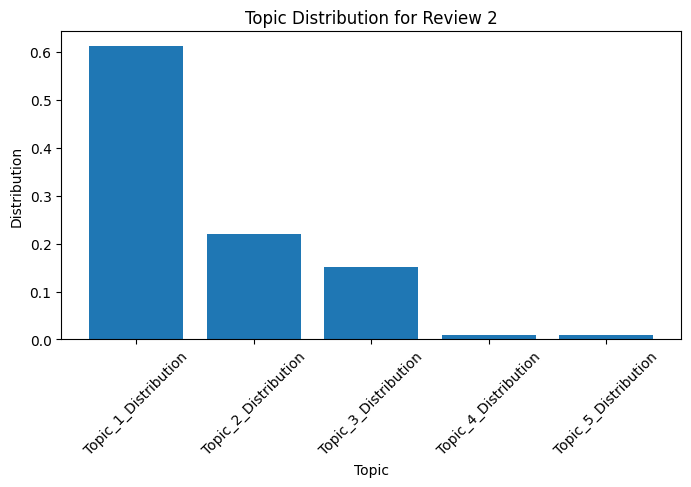

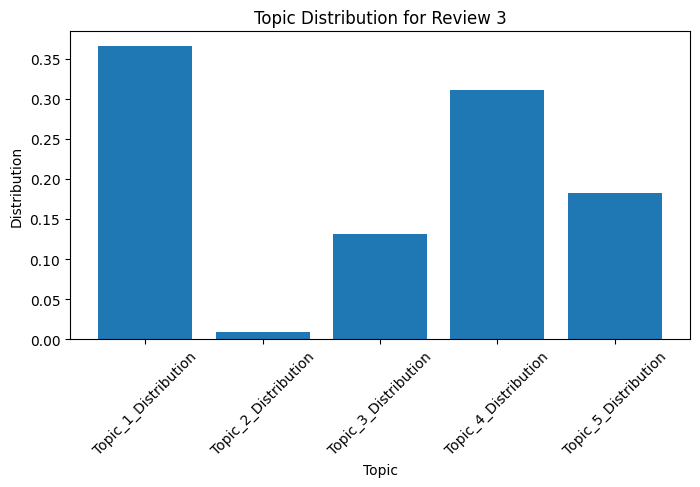

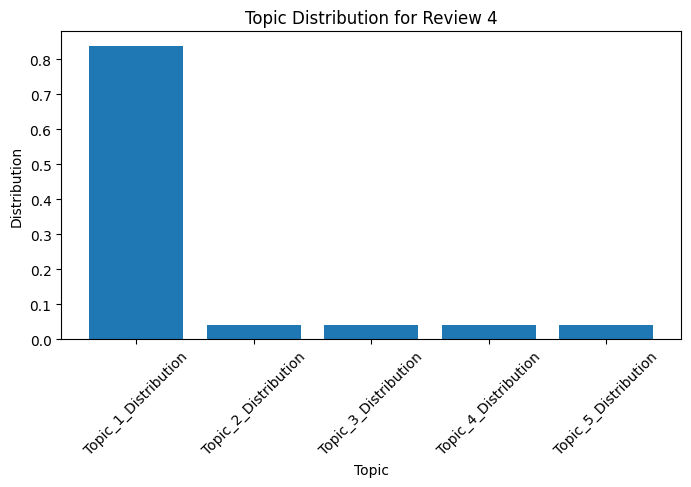

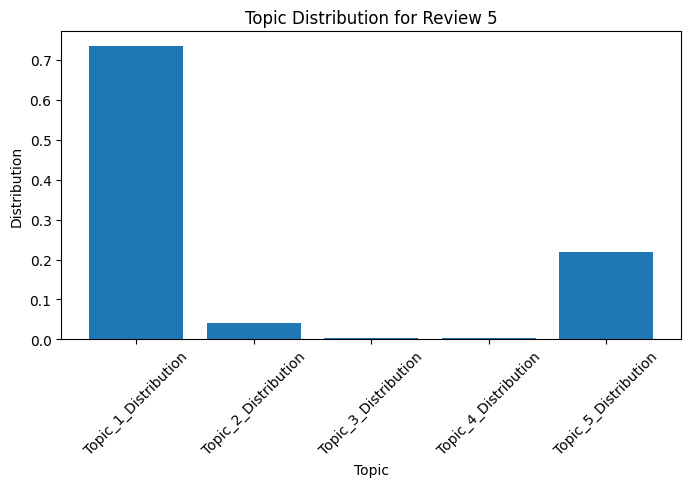

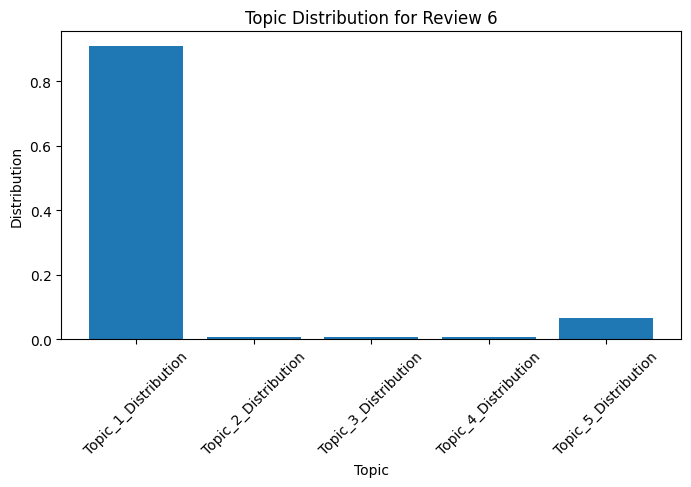

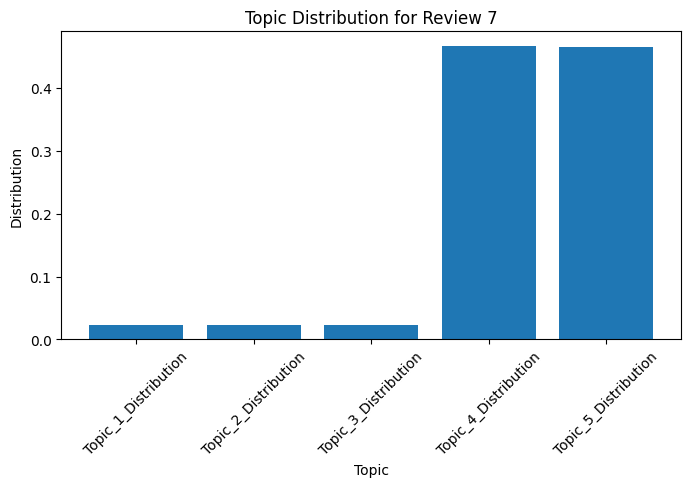

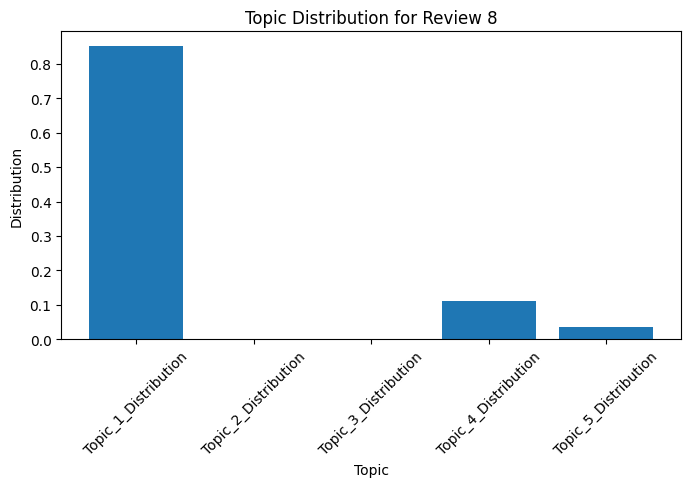

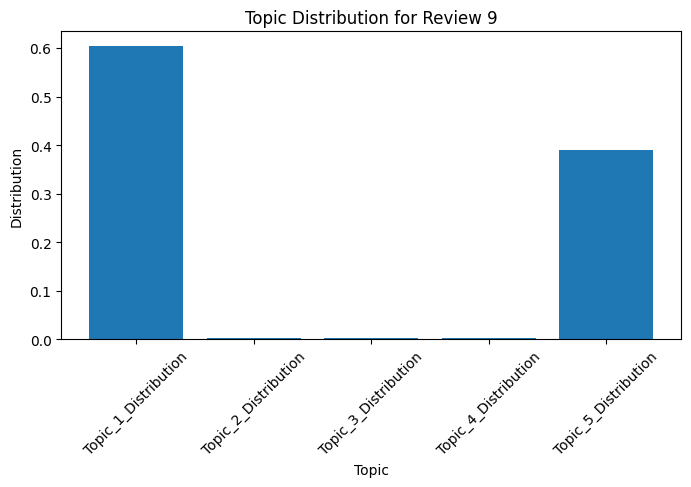

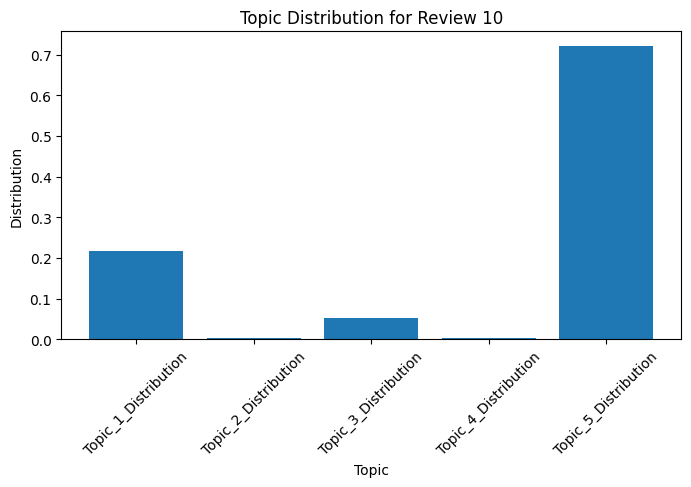

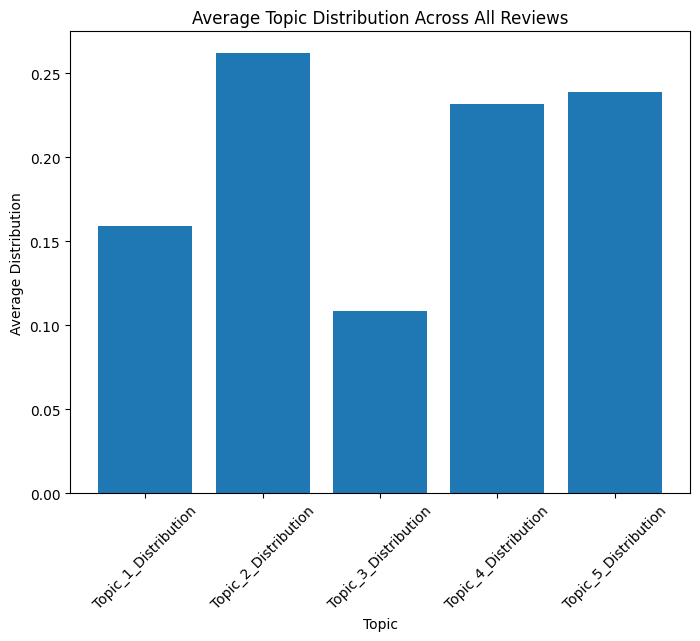

In [18]:
import matplotlib.pyplot as plt

# Plot the distribution of topics for the first few reviews
num_reviews = 10  # Number of reviews to plot
topics = [f"Topic_{i+1}_Distribution" for i in range(5)]
for i in range(num_reviews):
    plt.figure(figsize=(8, 4))
    plt.bar(topics, df_magazine.iloc[i][topics])
    plt.xlabel('Topic')
    plt.ylabel('Distribution')
    plt.title(f'Topic Distribution for Review {i+1}')
    plt.xticks(rotation=45)
    plt.show()

# Plot the average topic distribution across all reviews
avg_topic_distribution = df_magazine[topics].mean()
plt.figure(figsize=(8, 6))
plt.bar(topics, avg_topic_distribution)
plt.xlabel('Topic')
plt.ylabel('Average Distribution')
plt.title('Average Topic Distribution Across All Reviews')
plt.xticks(rotation=45)
plt.show()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


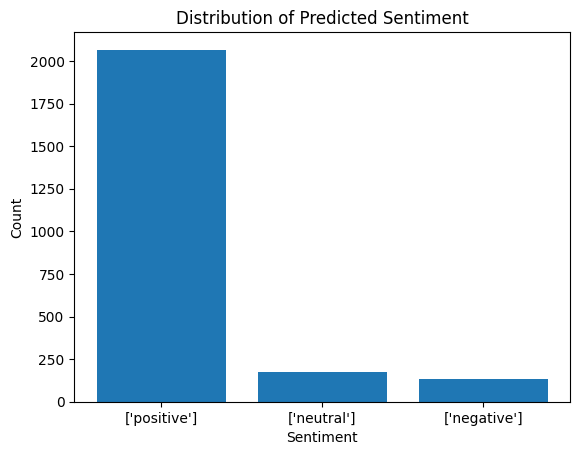

Accuracy of sentiment analysis: 0.74
Confusion Matrix:
[[  83   55  161]
 [  28   12  250]
 [  21  110 1655]]


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import nltk
nltk.download('vader_lexicon')


# Replace NaN values in the reviewText column with empty strings
df_magazine['reviewText'] = df_magazine['reviewText'].fillna('')

# Initialize the Sentiment Intensity Analyzer
sid = SentimentIntensityAnalyzer()

# Function to compute sentiment polarity
def get_sentiment(text):
    # Compute sentiment scores
    scores = sid.polarity_scores(str(text))  # Convert to string to handle NaN
    # Classify sentiment based on compound score
    if scores['compound'] >= 0.05:
        return "['positive']"
    elif scores['compound'] <= -0.05:
        return "['negative']"
    else:
        return "['neutral']"

# Apply sentiment analysis to review texts
df_magazine['predicted_sentiment'] = df_magazine['reviewText'].apply(get_sentiment)

# Visualize the distribution of predicted sentiment
sentiment_counts = df_magazine['predicted_sentiment'].value_counts()
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.title('Distribution of Predicted Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Compare predicted sentiment with actual ratings
accuracy = accuracy_score(df_magazine['sentiment'], df_magazine['predicted_sentiment'])
print(f"Accuracy of sentiment analysis: {accuracy:.2f}")

# Generate confusion matrix
conf_matrix = confusion_matrix(df_magazine['sentiment'], df_magazine['predicted_sentiment'])
print("Confusion Matrix:")
print(conf_matrix)